# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 - Has the network latency gone up since we switched internet service providers?
 - Is the website redesign any good?
 - Is our television ad driving more sales?

###  - Has the network latency gone up since we switched internet service providers (ISPs)?

#### Null Hypothesis: 
The network latency has NOT changed since we switched internet service providers.
    
#### Alternative Hypothesis: 
The network letency has changed since we switched internet service providers.
    

#### True positive: 
Rejecting the null hypothesis when there is actually a significant difference in latency since we switched ISPs. (we said there was a relationship and there acutally is)


#### True Negative: 
Accepting the null hypothesis when there is no significant difference in latency since we switched ISPs. (we said there is no relationship and we are correct)

    
#### Type I Error (False Positive):
Rejecting the null hypothesis when there is actually no significant difference in latency between ISPs.


#### Type II Error (False Negative):
Accepting the null hypothesis when there is actually a significant difference in latency between ISPs.



### - Is the website redesign any good?

#### Null Hypothesis: 
The website redesign has NOT changed our click through rate.
    
#### Alternative Hypothesis: 
The website redesign has changed our click through rate.
    
    
#### True positive: 
Data analysis reveals a significant change in the clickthrough rate after redesigning our website, which aligns with the alternative hypothesis.


#### True Negative:
Data analysis does not show any change in the clickthrough rate after redesigning our website which aligns with the null hypothesis.
    
    
#### Type I Error (False Positive): 
Data analysis indicates a significant change in the clickthrough rate after redesigning our website leading to the rejection of the null hypothesis. 

However, in reality, there is no actual change in the clickthrough rate, and the decrease is coincidental or due to other factors.

#### Type II Error (False Negative):
Data analysis does not show any change in the clickthrough rate after redesigning our website, we failed to reject the null hypothesis. 

However, in reality, there is a change in the clickthrough rate, which is genuinely caused by the web redesign.


### - Is our television ad driving more sales?

#### Null Hypothesis: 
Our television ad is making NO difference in our sales.
    
#### Alternative Hypothesis: 
Our television ad is making a difference in our sales.
    
#### True positive: 
The number of people buying our product has significantly increased after airing the television ad, supporting the alternative hypothesis.


#### True Negative: 
The number of people buying our product remains unchanged or does not significantly increase after airing the television ad, supporting the null hypothesis.

    
#### Type I Error (False Positive):
The number of people buying our product appears to have significantly increased after airing the television ad, but it is just due to random chance. In reality, the null hypothesis is true.



#### Type II Error (False Negative):
The number of people purchasing our product does not appear to have significantly increased after airing the television ad, but in reality, it has. This means we failed to reject the null hypothesis, even though the alternative hypothesis is true.





# Comparison of Groups

## The Chi-Square Test of Independence

### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

In [45]:
#standard data imports
import pandas as pd
import numpy as np

#pulling sample dataset
from pydataset import data

#new library!! for stats!!! 
from scipy import stats

In [83]:
# use the dictionary method to build dataframe
textbook_data = {
    'Codeup Student': [49, 1],
    'Not Codeup Student':[20,30],}

In [84]:
df=pd.DataFrame(textbook_data, index=['Uses a Macbook',"Doesn't Use A Mackbook"])

In [85]:
df

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Mackbook,1,30


In [31]:
# First: Form Hypothesis and set Confidence Interval    

- $H_o$: There is NO relationship between using a Macbook and being a Codeup Student
- $H_a$: There IS a relationship between using a Macbook and being a Codeup Student

In [32]:
# Set Alpha
alpha = .05

In [86]:
# we already have a crosstab so use chi2_contingency

stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [87]:
# create variables of the output
chi2, p, dof, expected = stats.chi2_contingency(df)

In [88]:
#output values so we can easily read them
print('Observed')
print(df.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [89]:
# Conclusion based on output variables
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# there is a relationship between codeup students and Macbook users

### 2 . Choose another 2 categorical variables from the mpg dataset.

 - State your null and alternative hypotheses.
 - State your alpha.
 - Perform a Chi^2 test of independence.
 - State your conclusion

In [90]:
#load mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [92]:
# Check out your column names and perform any cleanup you may want on them.

mpg.rename(columns = {'class':'class_type'}, inplace=True)
mpg.rename(columns = {'drv':'drive_wheel'}, inplace=True)
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drive_wheel',
       'cty', 'hwy', 'fl', 'class_type'],
      dtype='object')

In [ ]:
# State Hypothesis

- $H_o$: There is NO association between drive_wheel and class_type
- $H_a$: There IS a association between drive_wheel and class_type

In [ ]:
# State your alpha.
alpha = 0.05

In [93]:
# Perform a Chi^2 test of independence.


#make 'contingency' table using pandas crosstab
#this is our observed values
observed = pd.crosstab(mpg.drive_wheel, mpg.class_type)
observed


class_type,2seater,compact,midsize,minivan,pickup,subcompact,suv
drive_wheel,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [94]:
#use python function to calculate values
#it does all the work for us
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=221.6011438535253, pvalue=1.1048811174475079e-40, dof=12, expected_freq=array([[ 2.2008547 , 20.68803419, 18.04700855,  4.84188034, 14.52564103,
        15.40598291, 27.29059829],
       [ 2.26495726, 21.29059829, 18.57264957,  4.98290598, 14.94871795,
        15.85470085, 28.08547009],
       [ 0.53418803,  5.02136752,  4.38034188,  1.17521368,  3.52564103,
         3.73931624,  6.62393162]]))

In [95]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, 
# expected values
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [96]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0 12  3  0 33  4 51]
 [ 0 35 38 11  0 22  0]
 [ 5  0  0  0  0  9 11]]

Expected
[[ 2 20 18  4 14 15 27]
 [ 2 21 18  4 14 15 28]
 [ 0  5  4  1  3  3  6]]

----
chi^2 = 221.6011
p     = 0.0000


In [97]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [98]:
# we reject the null hypothesis
# there is an association between drive_wheel and class_type

### 3. Use the data from the employees database to answer these questions:

 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
 - Is an employee's gender independent of whether or not they are or have been a manager?    

In [104]:
import env

In [105]:
db = 'employees'

url = env.get_db_url(db)

In [101]:
# use a sql query that does most of the data prep work for you
query = '''
select gender,dept_name
from employees
	join dept_emp
		using (emp_no)
        join departments
        using (dept_no)
        WHERE to_date > now()
        AND dept_name IN ('Sales', 'Marketing');
'''

In [102]:
# create dataframe
emp_df =pd.read_sql(query, url)
emp_df.sample(5)

,gender,dept_name
3657,M,Marketing
24562,F,Sales
29122,F,Sales
49837,M,Sales
5984,M,Marketing


### -  Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [ ]:
# State Hypothesis

- $H_o$: An employee's gender is NOT associated with whether they work in sales or marketing
- $H_a$: An employee's gender is assocaited with whether they work in sales or marketing

In [66]:
# State your alpha.
alpha = 0.05

In [74]:
# Perform a Chi^2 test of independence.

#make 'contingency' table using pandas crosstab
#this is our observed values
observed_emp = pd.crosstab(emp_df.gender, emp_df.dept_name)
observed_emp


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [75]:
#use python function to calculate values
#it does all the work for us
stats.chi2_contingency(observed_emp)

Chi2ContingencyResult(statistic=0.3240332004060638, pvalue=0.5691938610810126, dof=1, expected_freq=array([[ 5893.2426013, 14969.7573987],
       [ 8948.7573987, 22731.2426013]]))

In [76]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, 
# expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_emp)

In [77]:
#output values
print('Observed')
print(observed_emp.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [78]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


fail to reject the null hypothesis


In [ ]:
# we fail to reject the null hypothesis
# An employee's gender is NOT dependent on whether they work in sales or marketing

### - Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
# State Hypothesis

- $H_o$: There is NO association between an employee's gender and whether they are or have been a manager.
- $H_a$: There IS an association between an employee's gender and whether they are or have been a manager.

In [103]:
# set alpha
alpha = 0.05

In [106]:
# pull the data we need from database

query = '''
select e.emp_no, e.gender, dm.to_date
from dept_manager as dm
	RIGHT join employees as e
		using (emp_no)
        ;
'''


In [107]:
manager_df =pd.read_sql(query, url)
manager_df.sample(5)

,emp_no,gender,to_date
140117,240093,M,None
276733,476709,M,None
34206,44207,F,None
280723,480699,F,None
273515,473491,M,None


In [114]:
# add column for employees who are or have been managers
# any employee that had been a manager will have an entry in to_date, everyone else has a null entry
# there is a limited number of people who have been or who are currently managers
manager_df['ever_manager'] = manager_df.to_date.notnull()
manager_df.sample(5)

,emp_no,gender,to_date,ever_manager
209617,409593,F,None,False
195708,295684,M,None,False
192220,292196,F,None,False
140553,240529,M,None,False
232395,432371,F,None,False


In [120]:
#make 'contingency' table using pandas crosstab
#this is our observed values
observed_manager = pd.crosstab(manager_df.ever_manager, manager_df.gender)
observed_manager

gender,F,M
ever_manager,,
False,120038,179962
True,13,11


In [121]:
#use python function to calculate values
#it does all the work for us
stats.chi2_contingency(observed_manager)

Chi2ContingencyResult(statistic=1.4566857643547197, pvalue=0.22745818732810363, dof=1, expected_freq=array([[1.20041397e+05, 1.79958603e+05],
       [9.60331174e+00, 1.43966883e+01]]))

In [122]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, 
# expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_manager)

In [123]:
#output values
print('Observed')
print(observed_emp.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[120041 179958]
 [     9     14]]

----
chi^2 = 1.4567
p     = 0.2275


In [124]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


fail to reject the null hypothesis


In [ ]:
# we fail to reject the null hypothesis
# There is NO association between an employee's gender and whether they are or have been a manager.

# Correlation

## 1. Answer with the type of stats test you would use (assume normal distribution):
 - Is there a relationship between the length of your arm and the length of your foot?
 - Does smoking affect when or not someone has lung cancer?
 - Is gender independent of a person’s blood type?
 - Does whether or not a person has a cat or dog affect whether they live in an apartment?
 - Does the length of time of the lecture correlate with a student's grade?

In [ ]:
# Is there a relationship between the length of your arm and the length of your foot?
# Two continuous variables: I would use Pearson's Correlation Coefficient.


In [ ]:
# Does smoking affect when or not someone has lung cancer?
# Two categorical variables: I would use Chi-square test. (smoker:yes or no and has lung cancer:yes or no)


In [ ]:
# Is gender independent of a person’s blood type?
# Two categorical variables: I would use Chi-square test. (there are not that many unique blood types)


In [ ]:
# Does whether or not a person has a cat or dog affect whether they live in an apartment?
# Two categorical variables: I would use Chi-square test. (pet: cat or dog and Appartment: yes or no)


In [ ]:
# Does the length of time of the lecture correlate with a student's grade?
# Two continuous vaiables (time and grades): I would use Pearson's Correlation Coefficient.


## 2. Use the telco_churn data.
 - Does tenure correlate with monthly charges?
 - Total charges?
 - What happens if you control for phone and internet service?

In [3]:
#standard data imports
import numpy as np
import pandas as pd

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats! 
from scipy import stats

import env

###  - Does tenure correlate with monthly charges?

In [6]:
db = 'telco_churn'

url = env.get_db_url(db)

In [3]:
query = '''
select tenure, monthly_charges
from customers;
'''

In [4]:
telco_df =pd.read_sql(query, url)
telco_df.sample(5)

,tenure,monthly_charges
5322,19,73.2
6803,17,94.4
5090,57,59.3
5027,1,45.3
4822,2,59.0


In [5]:
# Form hypothesis and set confidence interval

- $H_o$: There is NO linear relationship between tenure and monthly charges.
- $H_a$: There is a linear relationship between tenure and monthly charges.

In [6]:
alpha = 0.05

In [7]:
# calculate appropriate test statistic and p-value
stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)


PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [8]:
# print test results to easily read
r , p = stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)
print(r)
print(f'p     = {p:.4f}')

0.24789985628615246
p     = 0.0000


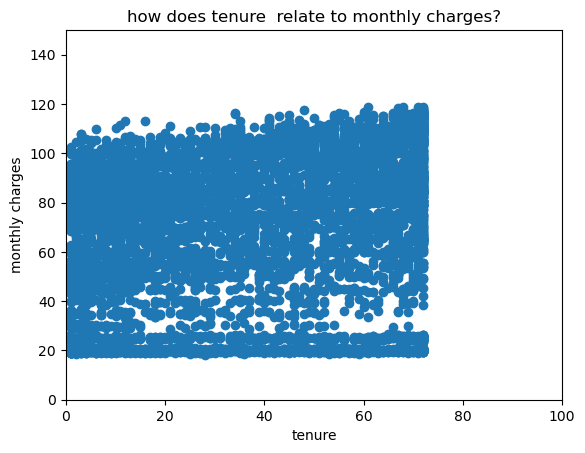

In [9]:
# Visualize

plt.scatter(telco_df.tenure, telco_df.monthly_charges)
plt.title('how does tenure  relate to monthly charges?')
plt.xlabel('tenure') #first value sent into scatter
plt.ylabel('monthly charges') #second value sent into scatter
plt.xlim(0, 100)
plt.ylim(0, 150)
plt.show()



In [10]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [11]:
# we reject the null hypothesis
# there is a linear relationship between tenure and monthly charges

### - Total charges?

In [12]:
query = '''
select tenure, total_charges
from customers;
'''

In [13]:
telco_df2 =pd.read_sql(query, url)
telco_df2.sample(5)

,tenure,total_charges
386,9,653.9
586,64,7222.75
2884,10,863.1
5508,34,1325.85
2029,8,140.95


In [14]:
# Form hypothesis and set confidence interval

- $H_o$: There is NO linear relationship between tenure and total charges.
- $H_a$: There is a linear relationship between tenure and total charges.

In [15]:
alpha = 0.05

In [16]:
telco_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [17]:
# NOTE: telco_df2.info() shows us that total_charges is an object not a numerical value
# there are also empty spaces in 11 rows (' ')

telco_df2['total_charges']= telco_df2['total_charges'].str.replace(' ', '0').astype(float)

telco_df2

# you dont have to replace with zero, you can drop the 11 rows.
#filter the 11 out
# keep rows that arent (!= ' ')
# df = df[df.total_charges != ' ']

,tenure,total_charges
0,9,593.30
1,9,542.40
2,4,280.85
3,13,1237.85
4,3,267.40
...,...,...
7038,13,742.90
7039,22,1873.70
7040,2,92.75
7041,67,4627.65


In [23]:
(telco_df2.total_charges == 0).sum()

11

In [18]:
# calculate appropriate test statistic and p-value
stats.pearsonr(telco_df2.tenure, telco_df2.total_charges)

PearsonRResult(statistic=0.8261783979502481, pvalue=0.0)

In [19]:
# print test results to easily read
r , p = stats.pearsonr(telco_df2.tenure, telco_df2.total_charges)
print(r)
print(f'p     = {p:.4f}')

0.8261783979502481
p     = 0.0000


In [20]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [21]:
# we reject the null hypothesis
# there is a linear relationship between tenure and total charges

### - What happens if you control for phone and internet service?

In [11]:
# NOTE: internet service type ID means nothing, its just 1,2,3. Join table with internet_service_types table 
# and see what 1,2,3 means.
query = '''
select *
from customers
JOIN internet_service_types
using (internet_service_type_id)
;
'''

In [9]:
telco_df3.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [29]:
telco_df3.internet_service_type_id.value_counts()
# internet service type ids are in a table in the database. 1 = dsl, 2 =fiber, 3 = no internet
# you have to join the tables or look through the other tables in the sql databse to find out what 1,2,3 mean.

internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64

In [12]:
telco_df3 =pd.read_sql(query, url)
telco_df3.sample(5)

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
2587,1,3701-SFMUH,Male,0,Yes,Yes,7,Yes,No,Yes,...,No,Yes,Yes,1,No,4,69.70,516.15,No,DSL
5032,1,7074-STDCN,Male,0,No,No,39,No,No phone service,No,...,Yes,No,Yes,1,Yes,1,40.60,1494.5,No,DSL
3242,3,4636-TVXVG,Male,0,Yes,Yes,62,Yes,No,No internet service,...,No internet service,No internet service,No internet service,2,No,3,19.95,1244.8,No,None
6988,2,9919-KNPOO,Female,0,Yes,No,21,Yes,Yes,No,...,No,Yes,Yes,1,Yes,1,94.30,1948.35,No,Fiber optic
962,3,1395-WSWXR,Male,0,No,No,24,Yes,No,No internet service,...,No internet service,No internet service,No internet service,3,No,2,20.75,487.05,No,None


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


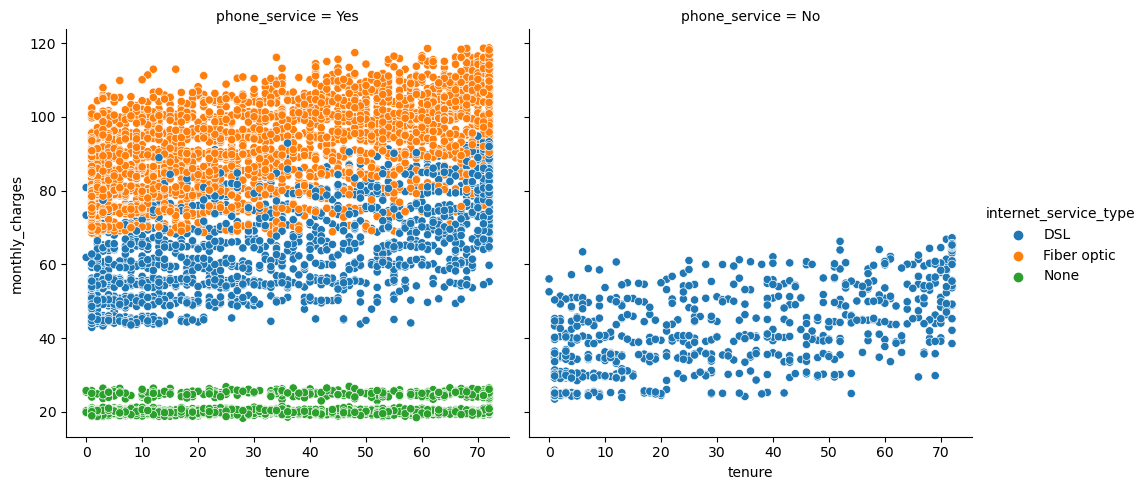

In [21]:
# plot it using hue to add the types of internet service, add col to see phone service (yes or no)
sns.relplot(data=telco_df3, y='monthly_charges', x='tenure',  col='phone_service', hue='internet_service_type')

In [25]:
# create function that runs our test
def run_pearsonr(telco_df3):
    r,p = stats.pearsonr(telco_df3.monthly_charges, telco_df3.tenure)
    return pd.Series((r,p))

In [26]:
# aggragate test over two variables
telco_df3.groupby(['phone_service', 'internet_service_type']).apply(run_pearsonr)

0              1
phone_service internet_service_type                         
No            DSL                    0.585760   4.603370e-64
Yes           DSL                    0.655385  5.676203e-214
              Fiber optic            0.624621   0.000000e+00
              None                   0.342326   3.356187e-43

In [ ]:
# Every itteration of our test has p-values less than alpha
# we can conclude that there is a linear relationship for monthly chrages 
# and tenure when we control for phone service and internet service type.

## 3. Use the employees database.
 - Is there a relationship between how long an employee has been with the company and their salary?
 - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [35]:
#standard data imports
import numpy as np
import pandas as pd

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats! 
from scipy import stats

import env

###  - Is there a relationship between how long an employee has been with the company and their salary?

In [36]:
db = 'employees'

url = env.get_db_url(db)

In [37]:
query = '''
select * 
from employees
	join salaries
		using (emp_no)
        WHERE to_date = '9999-01-01'
        ;
'''

In [38]:
emp_sal_df =pd.read_sql(query, url)
emp_sal_df.sample(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
167090,408648,1959-08-16,Halsur,Nittel,F,1987-07-15,126775,2001-08-07,9999-01-01
71019,98567,1956-08-25,Moss,Krohm,F,1994-08-28,63917,2001-09-13,9999-01-01
130921,263366,1953-05-04,Ewing,Bolotov,M,1987-10-12,88630,2001-10-08,9999-01-01
19805,34660,1963-08-31,Uwe,Murrill,F,1987-07-07,74251,2002-03-17,9999-01-01
219663,474323,1961-09-18,Mitchel,Anido,M,1994-06-15,53059,2002-06-13,9999-01-01


In [39]:
# Form hypothesis and set confidence interval

- $H_o$: There is NO linear relationship between tenure and salary.
- $H_a$: There is a linear relationship between tenure and salary.

In [40]:
alpha=0.05

In [41]:
# create a tenure column
# NOTE: the tenure_days col has a number and a word and a time inside of the col
emp_sal_df['tenure_days']=emp_sal_df.to_date - emp_sal_df.hire_date
emp_sal_df.head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,"2926512 days, 0:00:00"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,"2926729 days, 0:00:00"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,"2926449 days, 0:00:00"


In [43]:
# use the str.split function to separate the different parts of the element in the tenure_days column
emp_sal_df.tenure_days = emp_sal_df.tenure_days.astype('str').str.split(expand=True)[0]
emp_sal_df.head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449


In [10]:
emp_sal_df.tenure_days.head(3)

0    2926512
1    2926729
2    2926449
Name: tenure_days, dtype: object

In [11]:
# change the col to a numerical type so we can run our tests
emp_sal_df.tenure_days=emp_sal_df.tenure_days.astype(int)

In [12]:
emp_sal_df.tenure_days.head(3)

0    2926512
1    2926729
2    2926449
Name: tenure_days, dtype: int64

In [13]:
# now we can run test
stats.pearsonr(emp_sal_df.tenure_days, emp_sal_df.salary)

PearsonRResult(statistic=0.30646256131860095, pvalue=0.0)

In [16]:
# print values so they are easy to read
r , p = stats.pearsonr(emp_sal_df.tenure_days, emp_sal_df.salary)
print(r)
print(f'p     = {p:.4f}')

0.30646256131860095
p     = 0.0000


In [17]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# there is a linear relationship, a weak one (r-stat=.3), between employee tenure and salary.

### - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
# Form hypothesis and set confidence interval

- $H_o$: There is NO linear relationship between tenure and the number of titles they have had.
- $H_a$: There is a linear relationship between tenure and the number of titles they have had.

In [ ]:
alpha=0.05

In [23]:
# this query makes a tenure_days column a different way, we can do it in our sql query.
query = '''
select emp_no, count(title) as title_count, datediff(max(to_date), hire_date) as tenure_days
from employees
	join titles
		using (emp_no)
        group by emp_no
        having max(to_date) = '9999-01-01'
        ;
'''

In [27]:
# create dataframe
emp_sal_df2 =pd.read_sql(query, url)
emp_sal_df2.head(3)

,emp_no,title_count,tenure_days
0,10001,1,2926512
1,10002,1,2926729
2,10003,1,2926449


In [29]:
# create a dataframe with just the variables we need to test
emp_sal_df2 = emp_sal_df2[['title_count', 'tenure_days']]
emp_sal_df2.head(3)

,title_count,tenure_days
0,1,2926512
1,1,2926729
2,1,2926449


In [31]:
# now we can run test
stats.pearsonr(emp_sal_df2.title_count, emp_sal_df2.tenure_days)

PearsonRResult(statistic=0.2871267889704716, pvalue=0.0)

In [33]:
# print test values so they are easy to read
r , p = stats.pearsonr(emp_sal_df2.title_count, emp_sal_df2.tenure_days)
print(r)
print(f'p     = {p:.4f}')

0.2871267889704716
p     = 0.0000


In [34]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# there is a linear relationship, a weak one (r-stat=.2), between employee tenure and 
# the number of titles they have had.

## 4. Use the sleepstudy data.
 - Is there a relationship between days and reaction time?

In [ ]:
# Form hypothesis and set confidence interval

- $H_o$: There is NO linear relationship between number of days sleep deprived and reaction time.
- $H_a$: There is a linear relationship between number of days sleep deprived and reaction time.

In [47]:
# create dataframe from sleepstudy data
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [48]:
# run test
stats.pearsonr(sleep_df.Days, sleep_df.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

In [49]:
# print test values so they are easy to read
r , p = stats.pearsonr(emp_sal_df2.title_count, emp_sal_df2.tenure_days)
print(r)
print(f'p     = {p:.4f}')

0.2871267889704716
p     = 0.0000


In [50]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a linear relationship between number of days sleep deprived and reaction time.

# Comparing Means

## 1. Answer with the type of test you would use (assume normal distribution):
 - Is there a difference in grades of students on the second floor compared to grades of all students?
 - Are adults who drink milk taller than adults who don't drink milk?
 - Is the price of gas higher in Texas or in New Mexico?
 - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
#  - Is there a difference in grades of students on the second floor compared to grades of all students?
# Answer: 1 sample T-test two tail

In [ ]:
#  - Are adults who drink milk taller than adults who don't drink milk?
# Answer: 2 sample T-test one tail

In [ ]:
#  - Is the price of gas higher in Texas or in New Mexico?
# Answer: 2 sample T-test one tail

In [ ]:
#  - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
# Answer: ANOVA

## 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [56]:
stats.ttest_ind_from_stats?

In [ ]:
# Form hypothesis and set  significance level

- $H_o$: There is NO difference in the average time it takes to sell homes between office 1 and office 2.
- $H_a$: There is a difference in the average time it takes to sell homes between office 1 and office 2.

In [ ]:
alpha = 0.05  

In [ ]:
n1 = 40  # sample size for office #1
mean1 = 90  # mean for office #1
std1 = 15  # standard deviation for office #1

n2 = 50  # sample size for office #2
mean2 = 100  # mean for office #2
std2 = 20  # standard deviation for office #2


In [61]:
# Calculate the test statistic and p-value
stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [60]:
# assign variable for test statistic and p-value
t_stat, p = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

In [62]:
# print and evaluate p-value
print('T-Stat:', t_stat)

if p < alpha:
    print(f'P-Value: {p}. Reject the null hypothesis')
else:
    print(f'P-Value: {p}. Fail to reject the null hypothesis')

T-Stat: -2.6252287036468456
P-Value: 0.01020985244923939. Reject the null hypothesis


In [64]:
# we reject the null hypothesis
# There is a difference in the average time it takes to sell homes between office 1 and office 2.

## 3. Load the mpg dataset and use it to answer the following questions:
 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
 - Are compact cars more fuel-efficient than the average car?
 - Do manual cars get better gas mileage than automatic cars?

In [3]:
#load mpg dataset
mpg2 = data('mpg')
mpg2.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
# Form hypothesis and set significance level

- $H_o$: There is NO difference in fuel-efficiency in cars from 2008 vs 1999.
- $H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999.

In [22]:
alpha = 0.05

In [6]:
# create a new column for fuel efficiency
mpg2 = mpg2.assign(fuel_e = stats.hmean((mpg2.cty, mpg2.hwy)))

In [7]:
mpg2.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [15]:
# examine the continuous variable fuel_e across two categorical variables (2008 and 1999)
# create series of fuel efficiencies by year
fuel_99 = mpg2[mpg2.year == 1999].fuel_e
fuel_08 = mpg2[mpg2.year == 2008].fuel_e

In [34]:
type(fuel_99)

pandas.core.series.Series

In [29]:
print(fuel_99.shape )
fuel_08.shape

(117,)


(117,)

In [27]:
# run test
t, p = stats.ttest_ind(fuel_99, fuel_08, equal_var=True)

In [28]:
# print and evaluate p-value
print('T-Stat:', t)

if p < alpha:
    print(f'P-Value: {p}. Reject the null hypothesis')
else:
    print(f'P-Value: {p}. Fail to reject the null hypothesis')

T-Stat: 0.3011962975077886
P-Value: 0.7635345888327115. Fail to reject the null hypothesis


In [ ]:
# we fail to reject the null hypothesis
# There is NO difference in fuel-efficiency in cars from 2008 vs 1999.

### - Are compact cars more fuel-efficient than the average car?

In [ ]:
# Form hypothesis and set significance level

- $H_o$: Compact cars as as fuel-effeicent or less than the average car.
- $H_a$: Compact cars are more fuel-efficient than the average car.

In [ ]:
alpha = 0.05

In [ ]:
# perform a one sample test becuase we are comparing a sample to the population
# perfrom one tailed test because we are looking at direction (more than)

In [33]:
# explore the class coulumn
mpg2['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [35]:
# calculate population mean for fuel efficiency
pop_mean = mpg2.fuel_e.mean()
pop_mean

19.585525317633174

In [ ]:
# create series of fuel efficiency for only compact cars
fuel_e_compact = mpg2[mpg2['class'] == 'compact']['fuel_e']


In [38]:
# run test
t, p = stats.ttest_1samp(fuel_e_compact, pop_mean)

In [41]:
# print and evaluate p-value
print('T-Stat:', t)

if p < alpha:
    print(f'P-Value: {p}. Reject the null hypothesis')
else:
    print(f'P-Value: {p}. Fail to reject the null hypothesis')

T-Stat: 7.512360093161361
P-Value: 1.5617666348807277e-09. Reject the null hypothesis


In [42]:
# we reject the null hypothesis
# Compact cars are more fuel-efficient than the average car.

### - Do manual cars get better gas mileage than automatic cars?

In [ ]:
# Form hypothesis and set significance level

- $H_o$: Manual cars get the same or less gas mileage than automatic cars.
- $H_a$: Manual cars get better gas mileage than automatic cars.

In [ ]:
alpha = 0.05

In [ ]:
# perform a two sample t-test becuase we are comparing a subgroup to a subgroup.
# perfrom one-tailed test because we are looking at direction (more than)

In [48]:
# create boolean mask for automatic transmissions
mpg2.trans.str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [50]:
# create a new column with our mask
mpg2['is_automatic'] = mpg2.trans.str.startswith('a')

In [51]:
mpg2.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_e,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,False


In [52]:
# create series of fuel efficiency for automatics and manual transmissions  
automatic_fuel_e = mpg2[mpg2.is_automatic].fuel_e
manual_fuel_e = mpg2[~mpg2.is_automatic].fuel_e

In [57]:
manual_fuel_e.head(3)

pandas.core.series.Series

In [56]:
automatic_fuel_e.head(3)

1    22.212766
4    24.705882
5    19.809524
Name: fuel_e, dtype: float64

In [58]:
# run test
t, p = stats.ttest_ind(manual_fuel_e, automatic_fuel_e, equal_var=True)

In [59]:
# print and evaluate p-value
print('T-Stat:', t)

if p < alpha:
    print(f'P-Value: {p}. Reject the null hypothesis')
else:
    print(f'P-Value: {p}. Fail to reject the null hypothesis')

T-Stat: 4.652577547151351
P-Value: 5.510464610044009e-06. Reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# Manual cars get better gas mileage than automatic cars.